<a href="https://colab.research.google.com/github/sana1410/Natural-Language-Processing/blob/main/Sana_Module6_12172023_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT DESCRIPTION :-**

Twitter has emerged as a crucial communication channel during emergency situations. The prevalence of smartphones empowers individuals to report real-time emergencies, leading to increased interest from various entities, such as disaster relief organizations and news agencies, in systematically monitoring Twitter for timely updates.

In this challenge, your task is to construct a machine learning model capable of distinguishing tweets related to genuine disasters from those that are not. You will be provided with a dataset comprising 10,000 tweets that have been manually categorized for your analysis.

The Dataset is taken from kaggle [dataset](https://www.kaggle.com/competitions/nlp-getting-started)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train.shape

(7613, 5)

In [ ]:
test.shape

(3263, 4)

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train['text'][78]

'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM'

In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train.isna().sum()/len(train)*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [ ]:
train=train.drop(['location','keyword'],axis=1)

In [ ]:
test.isna().sum()/len(test)*100

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

In [ ]:
test=test.drop(['location','keyword'],axis=1)

**FEATURE ENGINEERING **

Generate new columns like
* No of charaters
* No of words
* No of Sentences
* No of Hashtags
* No of @s


In [ ]:
import nltk
from nltk import word_tokenize,sent_tokenize
nltk.download('punkt')
def num_chars(text):
  num_chars=len(text)
  return num_chars

train['num_chars']=train['text'].apply(num_chars)
test['num_chars']=test['text'].apply(num_chars)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def word_count(text):
  word=word_tokenize(text)
  return len(word)

train['no_of_words']=train['text'].apply(word_count)
test['no_of_words']=test['text'].apply(word_count)

In [ ]:
def sent_count(text):
  sent=sent_tokenize(text)
  return len(sent)

train['no_of_sents']=train['text'].apply(sent_count)
test['no_of_sents']=test['text'].apply(sent_count)

In [ ]:
import string
exclude=string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def no_of_hashtags(text):
  y=0
  for char in text:
    if char =='#' :
      y=y+1
    else:
      y=y
  return y


In [ ]:
import re
def no_of_urls(text):
  y=re.findall(r'http',text)
  z=re.findall(r'https',text)
  return len(y+z)

In [ ]:
train['text'][162]

'OMG Horrible Accident Man Died in Wings of Airplane. http://t.co/xDxDPrcPnS'

In [ ]:
no_of_urls(train['text'][162])

1

In [ ]:
train['no_of_hashtags']=train['text'].apply(no_of_hashtags)
test['no_of_hashtags']=test['text'].apply(no_of_hashtags)

In [ ]:
train['no_of_urls']=train['text'].apply(no_of_urls)
test['no_of_urls']=test['text'].apply(no_of_urls)

In [ ]:
train.head()

,id,text,target,num_chars,no_of_words,no_of_sents,no_of_hashtags,no_of_urls
0,1,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,1,0
1,4,Forest fire near La Ronge Sask. Canada,1,38,8,2,0,0
2,5,All residents asked to 'shelter in place' are ...,1,133,24,2,0,0
3,6,"13,000 people receive #wildfires evacuation or...",1,65,9,1,1,0
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,2,0


EDA

<Axes: xlabel='target', ylabel='count'>

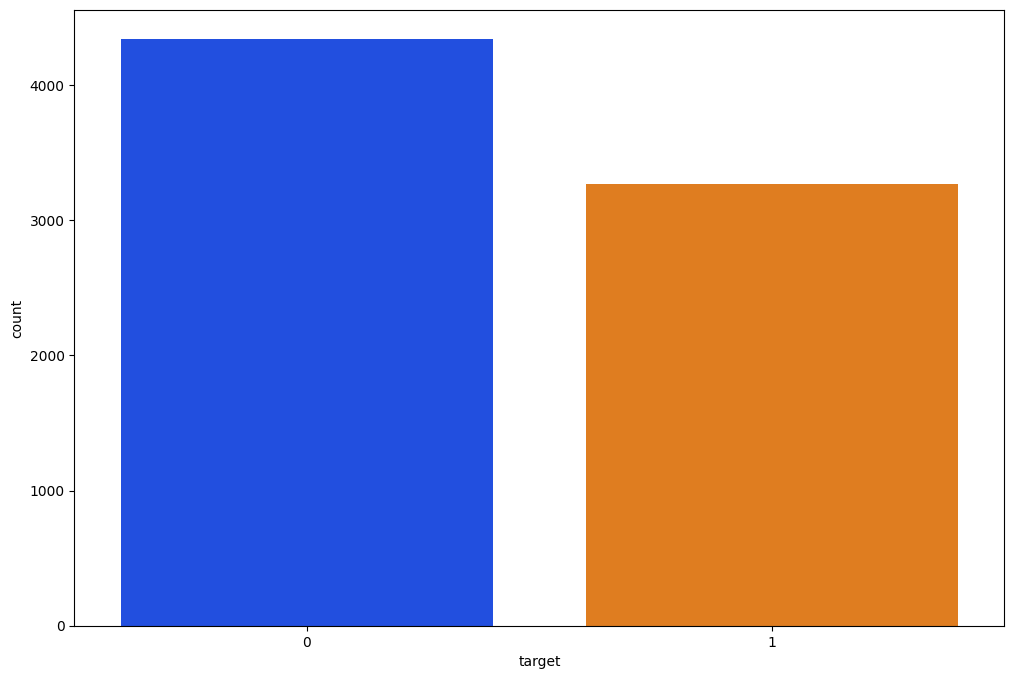

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(x='target',data=train,palette='bright')

<Axes: xlabel='num_chars', ylabel='Count'>

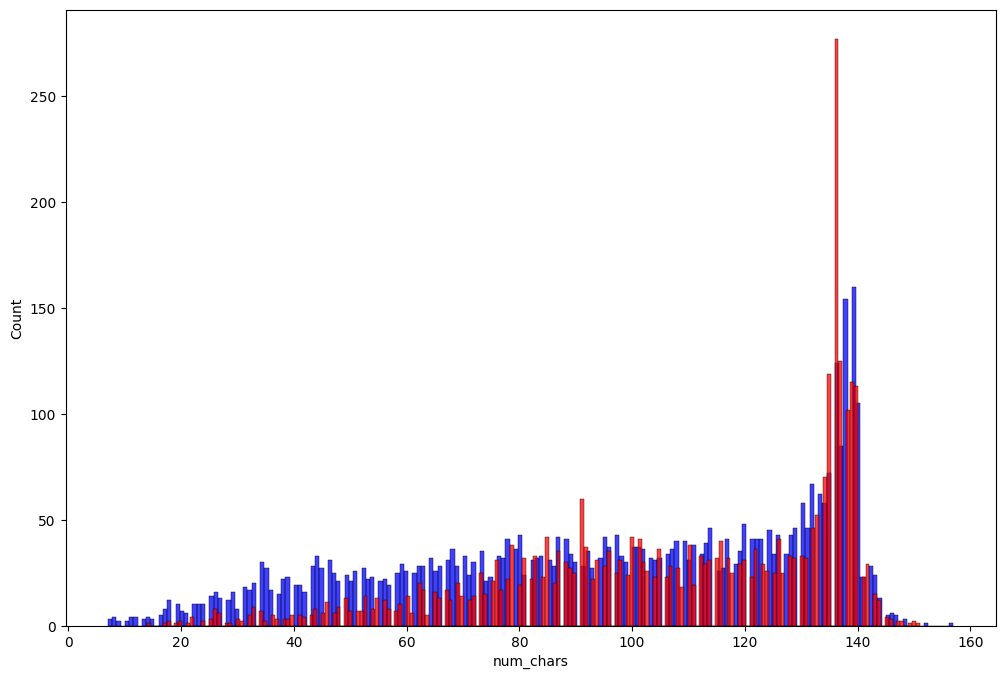

In [ ]:
plt.figure(figsize=(12,8))

sns.histplot(x='num_chars',data=train[train['target']==0],bins=200,color='blue')
sns.histplot(x='num_chars',data=train[train['target']==1],bins=200,color='red')

<Axes: xlabel='no_of_words', ylabel='Count'>

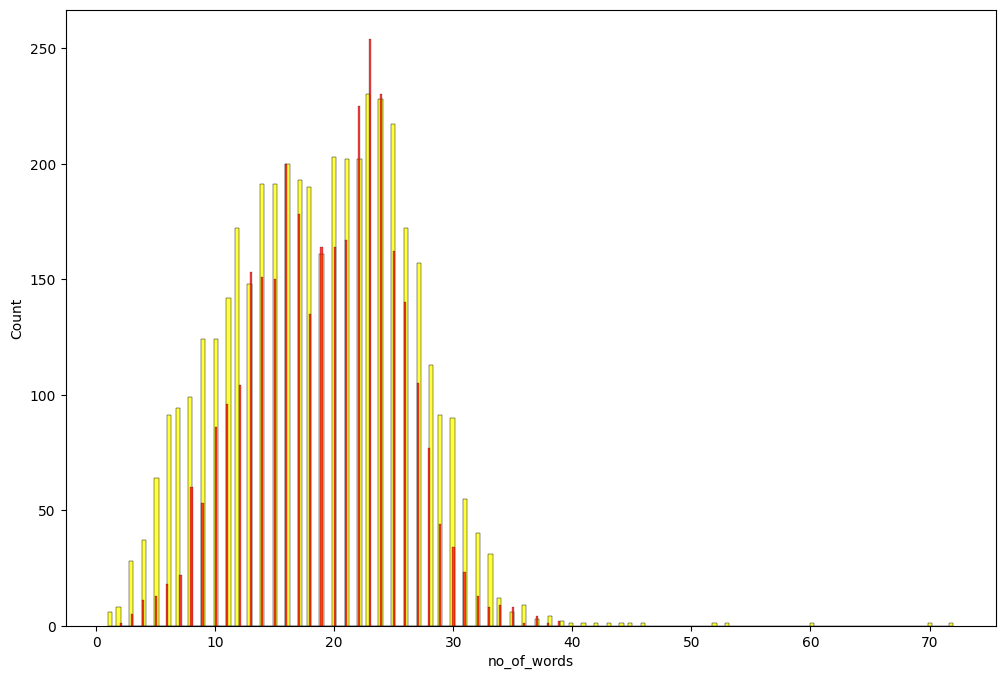

In [ ]:
plt.figure(figsize=(12,8))

sns.histplot(x='no_of_words',data=train[train['target']==0],bins=200,color='yellow')
sns.histplot(x='no_of_words',data=train[train['target']==1],bins=200,color='red')

<Axes: ylabel='no_of_urls'>

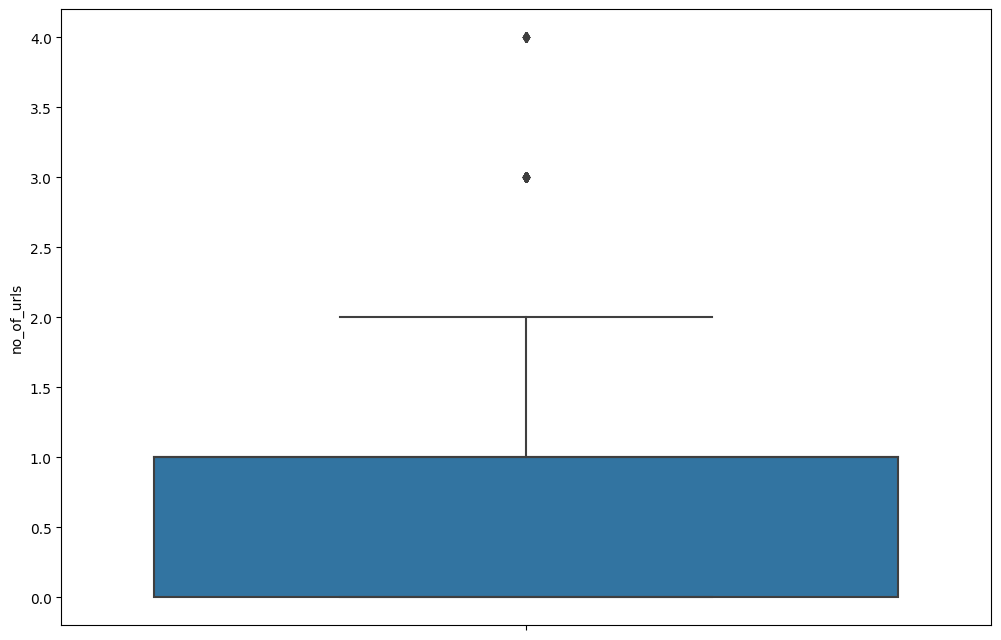

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(y='no_of_urls',data=train,hue=train['target'].astype('str'))


In [ ]:
train.groupby('target')['num_chars','no_of_words','no_of_sents','no_of_hashtags','no_of_urls'].sum()

<ipython-input-26-439ba326cdf1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('target')['num_chars','no_of_words','no_of_sents','no_of_hashtags','no_of_urls'].sum()


,num_chars,no_of_words,no_of_sents,no_of_hashtags,no_of_urls
target,,,,,
0,415559,81021,7239,1700,2481
1,353639,62989,4626,1703,2653


In [ ]:
train.groupby('target')['id'].count()

target
0    4342
1    3271
Name: id, dtype: int64

CREATING CORRELATION MATRIX

In [ ]:
matrix=train.iloc[:,[1,2,3,4,5,6,7]].corr()
matrix

<ipython-input-28-6d180c46e24e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=train.iloc[:,[1,2,3,4,5,6,7]].corr()


,target,num_chars,no_of_words,no_of_sents,no_of_hashtags,no_of_urls
target,1.000000,0.181817,0.043005,-0.129637,0.058115,0.160159
num_chars,0.181817,1.000000,0.871720,0.117245,0.210393,0.269897
no_of_words,0.043005,0.871720,1.000000,0.358064,0.228679,0.031212
no_of_sents,-0.129637,0.117245,0.358064,1.000000,0.015996,-0.140694
no_of_hashtags,0.058115,0.210393,0.228679,0.015996,1.000000,0.182531
no_of_urls,0.160159,0.269897,0.031212,-0.140694,0.182531,1.000000


<Axes: >

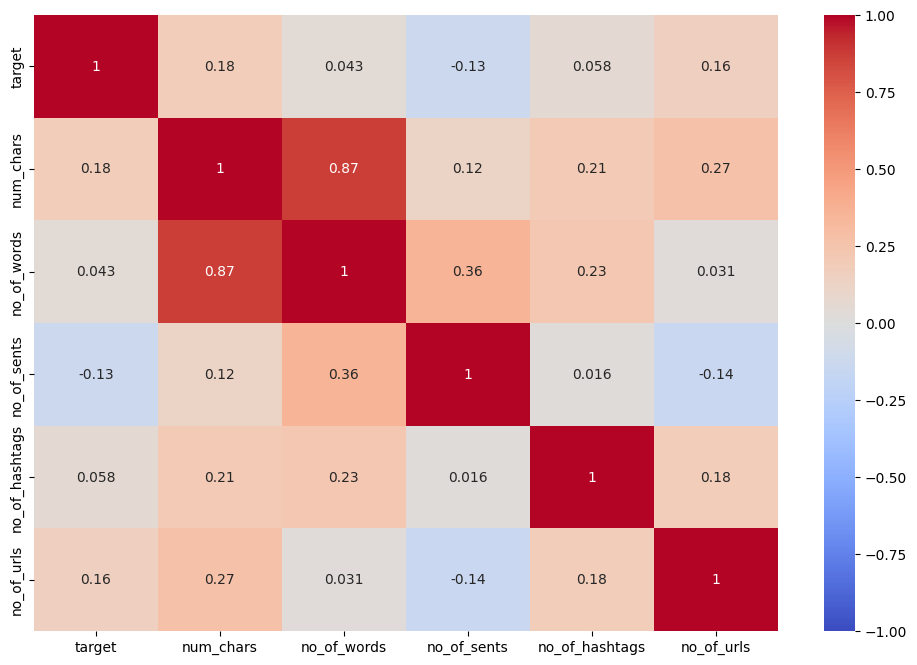

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(matrix,vmin=-1,vmax=1,annot=True,cmap='coolwarm')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7613 non-null   int64 
 1   text            7613 non-null   object
 2   target          7613 non-null   int64 
 3   num_chars       7613 non-null   int64 
 4   no_of_words     7613 non-null   int64 
 5   no_of_sents     7613 non-null   int64 
 6   no_of_hashtags  7613 non-null   int64 
 7   no_of_urls      7613 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 475.9+ KB


In [ ]:
train=train.drop('id',axis=1)

In [ ]:
test=test.drop('id',axis=1)

Text preprocessing

In [ ]:
example=train['text'][3643]
print(example)

There have been zero spider bite-related fatalities in Australia since 1979.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def text_transform(text):
  text=text.lower()                       #lower case
  text=re.sub(r'(?:https?://)?(?:www\.)?[a-zA-Z0-9-]+\.[a-zA-Z]{2,}(?:/[^\s]*)?','',text)   #remove word starting with https:\\ or http:\\
  words=word_tokenize(text)               #word tokenisation
  y=[]
  for word in words:                      #stopwords removal
    if word not in stop_words:
      y.append(word)
  text=' '.join(y)
  for char in exclude:                    # remove punctuations
    text=text.replace(char,' ')
  x=[]
  for word in word_tokenize(text):       ##stemming
    x.append(lemm.lemmatize(word))
  text=' '.join(x)
  text=re.sub(r'\W+',' ',text)
  text = re.sub(r'[^\x00-\x7F]+', ' ', text)


  return text

In [ ]:
text_transform(example)

'zero spider bite related fatality australia since 1979'

In [ ]:
train['new_text']=train['text'].apply(text_transform)

In [ ]:
test['new_text']=test['text'].apply(text_transform)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            3263 non-null   object
 1   num_chars       3263 non-null   int64 
 2   no_of_words     3263 non-null   int64 
 3   no_of_sents     3263 non-null   int64 
 4   no_of_hashtags  3263 non-null   int64 
 5   no_of_urls      3263 non-null   int64 
 6   new_text        3263 non-null   object
dtypes: int64(5), object(2)
memory usage: 178.6+ KB


Generating Word cloud for disaster as well as non diaster tweets

In [ ]:
disaster_text=' '.join(train[train['target']==1]['new_text'])

In [ ]:
disaster_text

'deed reason earthquake may allah forgive u forest fire near la ronge sask canada resident asked shelter place notified officer evacuation shelter place order expected 13 000 people receive wildfire evacuation order california got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado spring area m top hill see fire wood s emergency evacuation happening building across street m afraid tornado coming area three people died heat wave far haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding raining flooding florida tampabay tampa 18 19 day ve lost count flood bago myanmar arrived bago damage school bus 80 multi car crash breaking bbcmtd wholesale market ablaze africanbaze breaking news nigeria flag set ablaze aba inec office abia set ablaze barbados bridgetown jamaica   two car set ablaze santa 

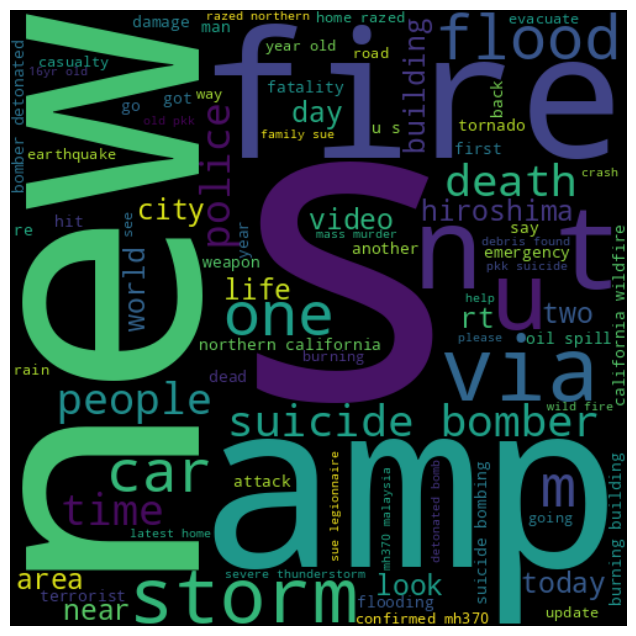

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, max_words=200).generate(disaster_text)

plt.figure(figsize=(20,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
non_disaster_text=' '.join(train[train['target']==0]['new_text'])

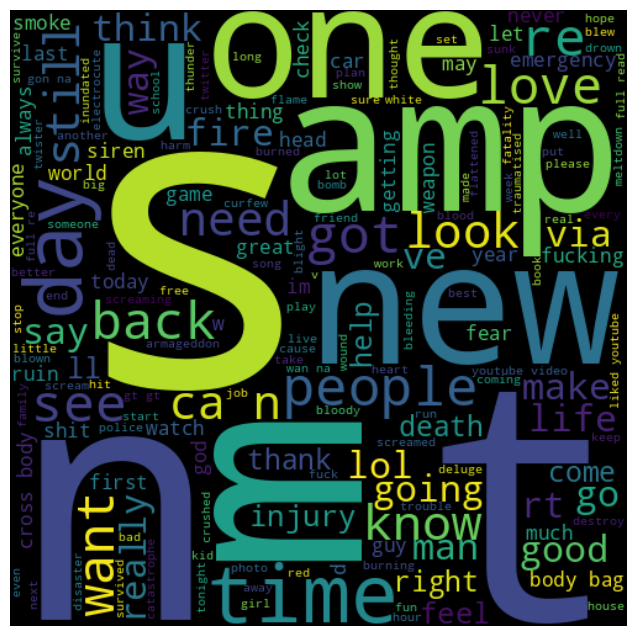

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, max_words=200).generate(non_disaster_text)

plt.figure(figsize=(20,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Text Vectorization**

1.   Countvectorize
2.   N-grams
3.   Tf-Idf



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
train_matrix=vector.fit_transform(train['new_text']).toarray()
names=vector.get_feature_names_out()

In [ ]:
test_matrix=vector.transform(test['new_text']).toarray()
names_test=vector.get_feature_names_out()

In [ ]:
train.shape

(7613, 8)

In [ ]:
test.shape

(3263, 7)

In [ ]:
train_matrix=pd.DataFrame(train_matrix,columns=names)

In [ ]:
train_matrix.head()

,00,000,0000,00end,00pm,01,02,0215,02pm,03,...,zonewolf123,zoom,zotar,zouma,zourryart,zrnf,zumiez,zurich,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_matrix=pd.DataFrame(test_matrix,columns=names_test)

In [ ]:
test_matrix.head()

,00,000,0000,00end,00pm,01,02,0215,02pm,03,...,zonewolf123,zoom,zotar,zouma,zourryart,zrnf,zumiez,zurich,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            7613 non-null   object
 1   target          7613 non-null   int64 
 2   num_chars       7613 non-null   int64 
 3   no_of_words     7613 non-null   int64 
 4   no_of_sents     7613 non-null   int64 
 5   no_of_hashtags  7613 non-null   int64 
 6   no_of_urls      7613 non-null   int64 
 7   new_text        7613 non-null   object
dtypes: int64(6), object(2)
memory usage: 475.9+ KB


In [ ]:
train_final_data=pd.concat([train.iloc[:,[1,2,4,5,6]],train_matrix],axis=1)

In [ ]:
train_final_data.shape

(7613, 15650)

In [ ]:
train_final_data.head()

,target,num_chars,no_of_sents,no_of_hashtags,no_of_urls,00,000,0000,00end,00pm,...,zonewolf123,zoom,zotar,zouma,zourryart,zrnf,zumiez,zurich,zxathetis,zzzz
0,1,69,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,133,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,65,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,88,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_final_data=pd.concat([test.iloc[:,[1,3,4,5]],test_matrix],axis=1)

In [ ]:
test_final_data.shape

(3263, 15649)

In [ ]:
test_final_data.head()

,num_chars,no_of_sents,no_of_hashtags,no_of_urls,00,000,0000,00end,00pm,01,...,zonewolf123,zoom,zotar,zouma,zourryart,zrnf,zumiez,zurich,zxathetis,zzzz
0,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Classification using randon forest classifier and k-fold cross validation

In [ ]:
X=train_final_data.iloc[:,1:]
Y=train_final_data.iloc[:,0]

In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
X.shape

(7613, 15649)

In [ ]:
Y.shape

(7613,)

In [ ]:
test_final_data.shape

(3263, 15649)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
rf=RandomForestClassifier(n_estimators=150)
k=KFold(n_splits=5,shuffle=True,random_state=43)
accuracy=cross_val_score(rf,X,Y,cv=k,n_jobs=-1).mean()
print(accuracy)

0.7893086558015812


In [ ]:
model=rf.fit(X,Y)

In [ ]:
Y_pred=model.predict(test_final_data)

In [ ]:
Y_pred=pd.DataFrame(Y_pred,columns=['Predicted_Class'])

In [ ]:
test=pd.concat([test,Y_pred],axis=1)

In [ ]:
test.head()

,text,num_chars,no_of_words,no_of_sents,no_of_hashtags,no_of_urls,new_text,Predicted_Class
0,Just happened a terrible car crash,34,6,1,0,0,happened terrible car crash,0
1,"Heard about #earthquake is different cities, s...",64,12,1,1,0,heard earthquake different city stay safe ever...,0
2,"there is a forest fire at spot pond, geese are...",96,22,1,0,0,forest fire spot pond goose fleeing across str...,1
3,Apocalypse lighting. #Spokane #wildfires,40,7,2,2,0,apocalypse lighting spokane wildfire,0
4,Typhoon Soudelor kills 28 in China and Taiwan,45,8,1,0,0,typhoon soudelor kill 28 china taiwan,1
